In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 408MB/s]


In [6]:
!unzip /content/credit-card-customer-churn-prediction.zip -d /content/

Archive:  /content/credit-card-customer-churn-prediction.zip
  inflating: /content/Churn_Modelling.csv  


In [42]:
import numpy as np
import pandas as pd


In [43]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [44]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [48]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [49]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [50]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [53]:
X = df.drop('Exited',axis=1)
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [120]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [123]:
history = model.fit(X_train_scaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5743 - loss: 0.6765 - val_accuracy: 0.7994 - val_loss: 0.4664
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4603 - val_accuracy: 0.8087 - val_loss: 0.4325
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8078 - loss: 0.4373 - val_accuracy: 0.8163 - val_loss: 0.4239
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.4210 - val_accuracy: 0.8188 - val_loss: 0.4180
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.4256 - val_accuracy: 0.8219 - val_loss: 0.4128
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8277 - loss: 0.4154 - val_accuracy: 0.8200 - val_loss: 0.4089
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.4071 - val_accuracy: 0.8275 - val_loss: 0.4050
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8325 - loss: 0.3987 - val_accu

In [124]:
#1st layer weights and biases
model.layers[0].get_weights()

[array([[-1.66127518e-01,  8.26808810e-02, -9.03678238e-02,
          9.67830513e-03, -5.90011291e-02, -1.84203938e-01,
          8.97533447e-02,  3.81401062e-01, -3.46731246e-01,
          2.52479941e-01,  5.59976650e-03],
        [ 9.98769999e-01, -2.66240656e-01,  3.12524199e-01,
          1.11001539e+00, -4.58435178e-01,  1.84238646e-02,
         -1.99827492e-01,  3.98093283e-01, -4.63057011e-01,
          2.07873210e-01,  1.18217982e-01],
        [ 6.39160573e-02,  1.37575984e-01,  1.58088822e-02,
         -8.24170783e-02,  6.98100626e-02,  1.09526046e-01,
         -1.74058601e-01,  7.44544640e-02, -1.86239064e-01,
         -4.80150670e-01, -4.13641892e-02],
        [-1.45490199e-01, -4.76013392e-01,  1.59892023e-01,
          2.36514106e-01, -5.25806785e-01, -7.78474435e-02,
         -7.56786019e-02, -2.58056968e-01, -1.00487240e-01,
          2.36296967e-01, -3.72956008e-01],
        [-4.78963017e-01, -4.40963328e-01, -2.66560674e-01,
          6.68244720e-01, -3.76118213e-01, -

In [125]:
#2nd layer weights and biases
model.layers[1].get_weights()

[array([[-0.9392957 ,  0.45875177, -0.42274258, -0.03986032, -0.57357377,
         -0.5608887 , -0.5663752 ,  0.53986466,  0.2922122 ,  0.69613373,
         -0.5782007 ],
        [-0.07983496,  0.14823687, -0.32950783,  0.26224062,  0.07825273,
          0.4695632 ,  0.1618757 ,  0.34415478,  0.4824125 ,  0.03686415,
         -0.82157695],
        [ 0.12348759,  0.38914618,  0.23698092, -0.27989244,  0.22563812,
          0.6158607 ,  0.5767474 , -0.01871995, -0.6955393 ,  0.3895311 ,
         -0.61866033],
        [ 0.76448554,  0.33927867,  0.6450131 , -0.27496195, -0.51546705,
         -0.40695283, -0.60110784,  0.54068685, -0.23289478,  0.43717203,
          0.63689566],
        [ 0.24160849, -0.1826552 , -0.6794106 ,  0.15558274, -0.59282136,
          0.11010678,  0.17722934,  0.06237594, -0.9615725 ,  0.24537417,
         -0.23696439],
        [-0.4623787 , -0.14233159,  0.23368797,  0.08525258,  0.03456341,
          0.10328939,  0.21435556,  0.09356784, -0.0945839 ,  0.0921944

In [126]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [127]:
y_pred = np.where(y_log>0.5, 1,0)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8605


array([[1514,   71],
       [ 208,  207]])

In [129]:
import matplotlib.pyplot as plt

In [130]:
history.history

{'accuracy': [0.7054687738418579,
  0.8060937523841858,
  0.8189062476158142,
  0.8246874809265137,
  0.8276562690734863,
  0.8292187452316284,
  0.8307812213897705,
  0.8306249976158142,
  0.831250011920929,
  0.832812488079071,
  0.8359375,
  0.8387500047683716,
  0.8393750190734863,
  0.8423437476158142,
  0.8420312404632568,
  0.8446875214576721,
  0.8485937714576721,
  0.8495312333106995,
  0.8531249761581421,
  0.8564062714576721,
  0.8556249737739563,
  0.8570312261581421,
  0.8568750023841858,
  0.8581249713897705,
  0.8610937595367432,
  0.8595312237739563,
  0.859375,
  0.8612499833106995,
  0.8615624904632568,
  0.8606250286102295,
  0.8621875047683716,
  0.8628125190734863,
  0.8612499833106995,
  0.8629687428474426,
  0.8637499809265137,
  0.8623437285423279,
  0.8628125190734863,
  0.8620312213897705,
  0.8645312786102295,
  0.8635937571525574,
  0.862500011920929,
  0.86328125,
  0.864062488079071,
  0.864062488079071,
  0.8642187714576721,
  0.8637499809265137,
  0.8643

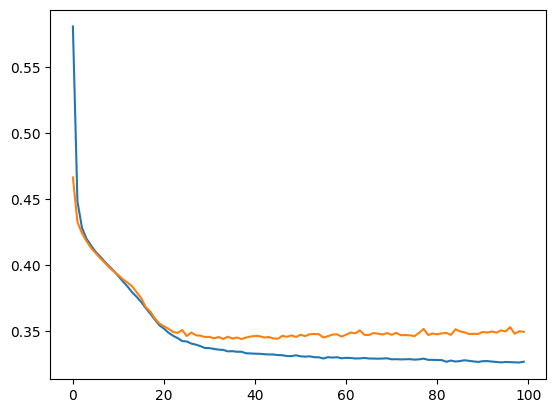

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

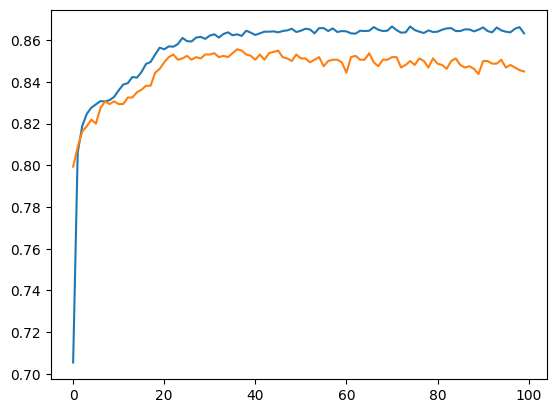

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])